# Neural network with Fashion_mnist dataset

## Agenda
        1 - Loading data
            Splitting data into training and test data
        2 - Creating model
            Training model.
            Testing model.
        3 - Using the Model

In [19]:
# Numeric Python
import numpy as np 
# Graphs
import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf

# API for tensorflow (it allows us to write less code)
from tensorflow import keras

In [2]:
# Loading data from keras
data = keras.datasets.fashion_mnist

**Splitting data into training and test data**

    Basically:
        training: Runs the model.
        test: Validates the model.

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
break_point = 0
for category in train_labels:
    print(category)
    if break_point == 5: break
    break_point+=1

9
0
0
3
0
2


    As you can see, the labels are in numerical format. This is good for our computation,
    but we also need meaningful names so we can know what is happening.

    Let's define a list of the class names and pre-process images. The documentation tell
    us what these are, so I'll just copy and paste.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

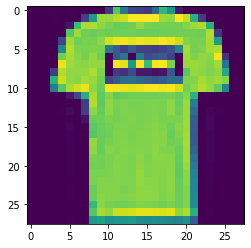

In [6]:
plt.imshow(train_images[1])
plt.show()

In [7]:
# Image's matrix
print(train_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

**Dividing each image by 255 we'll scaling the pixel values down to make computations easier for our model.**

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

**As I said, it won't really change anything to us, just make the computations easier**

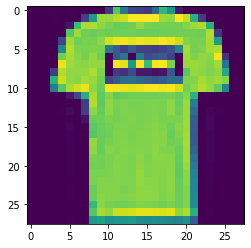

In [9]:
plt.imshow(train_images[1])
plt.show()

In [12]:
# Same Matrix divided
print(train_images[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
 

## 2 - Creating model

    Now, We want to pass those information into a model, so it can
    decide what class each image is. (remember that those classes 
    are in between 0 and 9 and we labeled them to see names and not numbers).

In [21]:
# Defining architecture
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),    # input layer with 784 neurons(28*28)
                         keras.layers.Dense(128, activation='relu'),     # hidden layer with 128 neurons (15% of input)
                         keras.layers.Dense(10, activation='softmax')]) # output layer of 10 neurons representing... 
                                                                        #...the probability of the picture being...
                                                                        #...each of the 10 classes.

**Training model.** Now that we have defined the model it is time to compile and train it.
        
        Compiling the model is just picking the optimizer,
        loss function and metrics to keep track of. 
        Training is the process of passing our data to the model.

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Actual Training
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 398us/sample - loss: 0.4937 - accuracy: 0.8264
Epoch 2/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.3735 - accuracy: 0.8641
Epoch 3/5
60000/60000 [==============================] - 21s 358us/sample - loss: 0.3346 - accuracy: 0.8786
Epoch 4/5
60000/60000 [==============================] - 20s 328us/sample - loss: 0.3119 - accuracy: 0.8850
Epoch 5/5
60000/60000 [==============================] - 18s 308us/sample - loss: 0.2919 - accuracy: 0.8920


**Testing the Model**
    
    Now that the model has been trained it is time to test it for accuracy.
    We will give it the a new set of images test_images(wich it has never seen)
    and the correct labels, so It'll use what it has learned from the training
    to classify the new data.

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('\n Test accuracy: ', test_accuracy, '% of right predictions/classifications')

10000/10000 [==============================] - 2s 207us/sample - loss: 0.3570 - accuracy: 0.8689

 Test accuracy:  0.8689 % of acerts


### 3 - Using the Model

     We will pick a few images from our testing data, 
     show them on the screen and then use the model to predict what they are.

    To make predictions we use .predict() passing it a list of data to predict.
    It is important that we understand it is used to make MULTIPLE predictions 
    and that whatever data it is expecting must be inside of a list. 
    Since it is making multiple predictions it will also return to use a list of predicted values.

In [31]:
predictions = model.predict(test_images)
predictions[0:5]

array([[7.9601587e-06, 1.9940748e-08, 4.3534439e-07, 7.2631750e-08,
        5.7852134e-07, 5.7343165e-03, 6.6112074e-07, 5.9663840e-02,
        1.8109009e-05, 9.3457401e-01],
       [3.5338828e-05, 5.2200900e-11, 9.9795270e-01, 7.3816624e-09,
        1.6421102e-03, 1.9319475e-11, 3.6981708e-04, 5.0963099e-14,
        2.8182615e-08, 1.8535042e-11],
       [8.2229280e-07, 9.9999917e-01, 3.1856655e-09, 2.4666605e-08,
        3.5281900e-08, 5.3835335e-15, 7.4853290e-10, 1.3588811e-17,
        3.1940874e-12, 1.9846227e-13],
       [3.8795133e-06, 9.9998844e-01, 7.3464307e-08, 7.2744069e-06,
        2.6964801e-07, 4.1460130e-12, 3.3196432e-08, 7.4736994e-16,
        6.3636686e-11, 2.3062850e-11],
       [3.3779082e-01, 3.6414237e-06, 9.4004795e-02, 6.5320646e-03,
        1.9522086e-02, 3.0084209e-05, 5.3660786e-01, 1.8950925e-05,
        5.4800324e-03, 9.7486645e-06]], dtype=float32)

**Now let's display the first 5 images and their predictions using matplotlib.**

matrix: [7.9601587e-06 1.9940748e-08 4.3534439e-07 7.2631750e-08 5.7852134e-07
 5.7343165e-03 6.6112074e-07 5.9663840e-02 1.8109009e-05 9.3457401e-01]


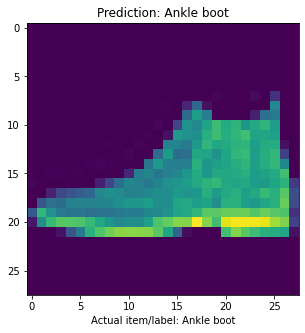

matrix: [3.5338828e-05 5.2200900e-11 9.9795270e-01 7.3816624e-09 1.6421102e-03
 1.9319475e-11 3.6981708e-04 5.0963099e-14 2.8182615e-08 1.8535042e-11]


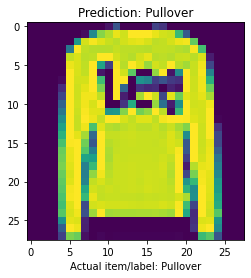

matrix: [8.2229280e-07 9.9999917e-01 3.1856655e-09 2.4666605e-08 3.5281900e-08
 5.3835335e-15 7.4853290e-10 1.3588811e-17 3.1940874e-12 1.9846227e-13]


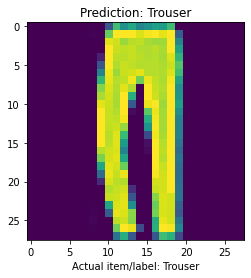

matrix: [3.8795133e-06 9.9998844e-01 7.3464307e-08 7.2744069e-06 2.6964801e-07
 4.1460130e-12 3.3196432e-08 7.4736994e-16 6.3636686e-11 2.3062850e-11]


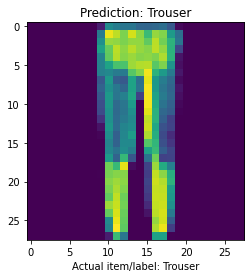

matrix: [3.3779082e-01 3.6414237e-06 9.4004795e-02 6.5320646e-03 1.9522086e-02
 3.0084209e-05 5.3660786e-01 1.8950925e-05 5.4800324e-03 9.7486645e-06]


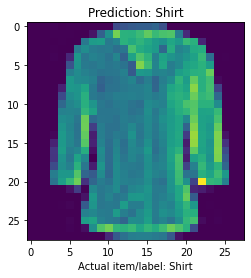

In [42]:
plt.figure(figsize=(5,5))

for image in range(5):
    print(f'matrix: {predictions[image]}')
    plt.grid(False)
    plt.imshow(test_images[image])
    plt.xlabel(f'Actual item/label: {class_names[test_labels[image]]}')
    plt.title(f'Prediction: {class_names[np.argmax(predictions[image])]}')
    plt.show()